In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('spambase.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=421)


0.9153094462540716
[[536  37]
 [ 41 307]]


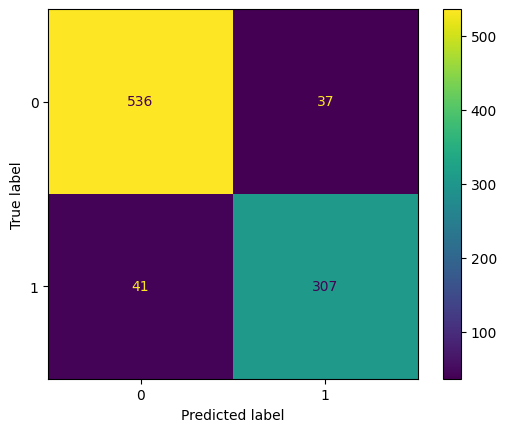

In [6]:
from sklearn.svm import SVC
linear_svm=SVC(kernel='linear',random_state=42)
linear_svm.fit(x_train,y_train)
ypred=linear_svm.predict(x_test)
acc=accuracy_score(y_test,ypred)
conf=confusion_matrix(y_test,ypred)
print(acc)
print(conf)
dis=ConfusionMatrixDisplay(confusion_matrix=conf)
dis.plot()
plt.show()

0.9239956568946797
[[544  29]
 [ 41 307]]


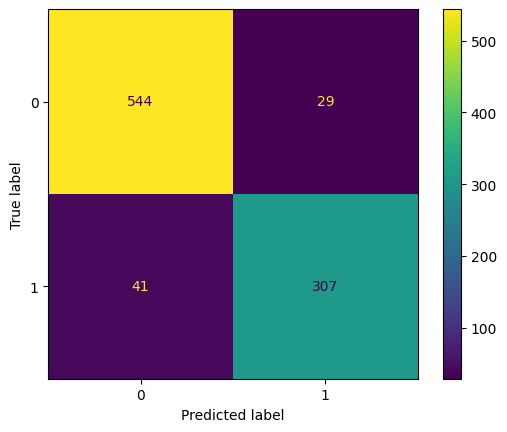

In [7]:
from sklearn.svm import SVC
rbf_svm=SVC(kernel='rbf',random_state=42)
rbf_svm.fit(x_train,y_train)
ypred=rbf_svm.predict(x_test)
acc=accuracy_score(y_test,ypred)
conf=confusion_matrix(y_test,ypred)
print(acc)
print(conf)
dis=ConfusionMatrixDisplay(confusion_matrix=conf)
dis.plot()
plt.show()

In [9]:
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
rbf_svm=SVC(kernel='rbf',random_state=42)
rbf_svm.fit(x_train,y_train)
linear_svm=SVC(kernel='linear',random_state=42)
linear_svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

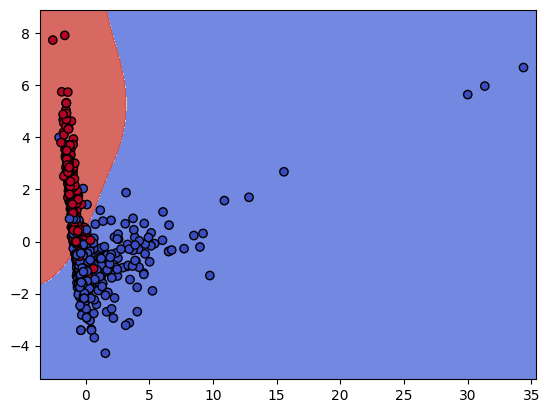

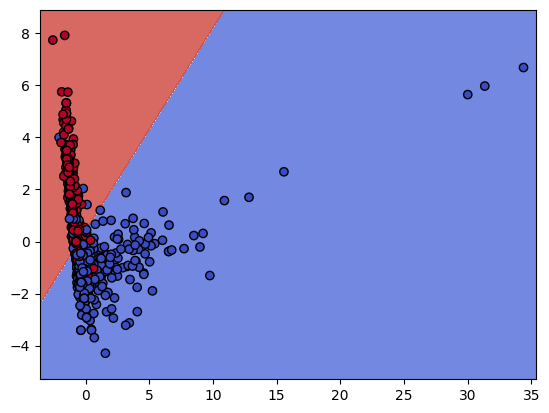

In [19]:
def plot_decisiontree(est,x,y):
   h=0.02
   xmin,xmax=x[:,0].min()-1,x[:,0].max()+1
   ymin,ymax=x[:,1].min()-1,x[:,1].max()+1
   xx,yy=np.meshgrid(np.arange(xmin,xmax,h),
                     np.arange(ymin,ymax,h))
   z=est.predict(np.c_[xx.ravel(),yy.ravel()])
   z=z.reshape(xx.shape)
   plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm,alpha=0.8)
   plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm,edgecolors='k')
   plt.show()

plot_decisiontree(rbf_svm,x_test,y_test)
plot_decisiontree(linear_svm,x_test,y_test)
